In [1]:
### MS Thesis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE


In [2]:


def CalcOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return
import warnings
warnings.filterwarnings('ignore')

## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df



In [3]:
df_identity = pd.read_csv("D:\\analytics\\MS\\LJMU_Phase\\Papers\\Reasearch Thesis\\Credit Card Fraud Detection\\Datasets\\train_identity.csv")

df_trans = pd.read_csv("D:\\analytics\\MS\\LJMU_Phase\\Papers\\Reasearch Thesis\\Credit Card Fraud Detection\\Datasets\\train_transaction.csv")



In [4]:
def calc_null_percent(x):
    return 100*(x/590540)



In [6]:
#df_identity.info()

In [5]:
###
print(df_identity.shape)

print(df_identity.columns)

print(df_identity.head())

(144233, 41)
Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')
   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33        

In [6]:
df_identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [7]:
print(df_trans.shape)

#print(df_trans.columns)

#df_trans.head()

(590540, 394)


In [8]:
df = pd.merge(df_trans, df_identity,how = "left", on = ['TransactionID'])

print(df.shape)

print(df.columns)

(590540, 434)
Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


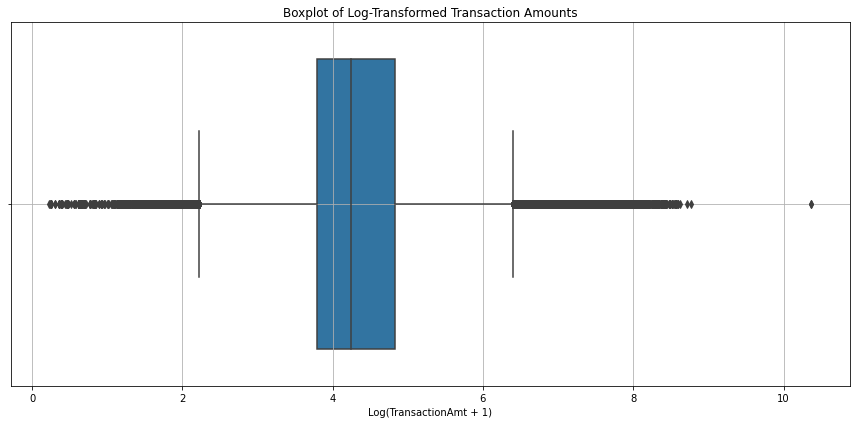

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Example Dataset Structure
# df should include 'TransactionAmt', 'TransactionDT', 'isFraud', etc.

# 1. Statistical Summary
def generate_statistical_summary(df, numerical_columns):
    summary = df[numerical_columns].describe().T
    summary['median'] = df[numerical_columns].median()
    print("Statistical Summary:\n", summary[['mean', 'median', 'std', 'min', 'max']])
    return summary[['mean', 'median', 'std', 'min', 'max']]

# 2. Outlier Detection with Boxplots
def plot_boxplots(df, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# 3. Trend Analysis Over Time
def plot_fraud_trends(df, datetime_col='TransactionDT', label_col='isFraud'):
    # Convert to datetime if not already
    df[datetime_col] = pd.to_datetime(df[datetime_col], unit='s', errors='coerce')
    df['week'] = df[datetime_col].dt.isocalendar().week
    df['month'] = df[datetime_col].dt.month

    weekly_trend = df.groupby('week')[label_col].agg(['count', 'sum'])
    monthly_trend = df.groupby('month')[label_col].agg(['count', 'sum'])

    # Weekly Trend Plot
    weekly_trend.rename(columns={'count': 'Total Transactions', 'sum': 'Fraudulent Transactions'}, inplace=True)
    weekly_trend.plot(title='Weekly Fraud Trend', figsize=(10, 5))
    plt.show()

    # Monthly Trend Plot
    monthly_trend.rename(columns={'count': 'Total Transactions', 'sum': 'Fraudulent Transactions'}, inplace=True)
    monthly_trend.plot(title='Monthly Fraud Trend', figsize=(10, 5))
    plt.show()

# Example Usage
numerical_columns = [
    'TransactionAmt', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    #'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'id_01', 'id_02', 'id_03', 'id_04', 'id_05'
]
  # Add relevant columns here
features_to_plot = ['TransactionAmt'] #, 'C1', 'D1'
df['TransactionAmt_log'] = np.log1p(df['TransactionAmt'])

#generate_statistical_summary(df, numerical_columns)
#plot_boxplots(df, features_to_plot)
# plot_fraud_trends(df)

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['TransactionAmt_log'])
plt.title("Boxplot of Log-Transformed Transaction Amounts")
plt.xlabel("Log(TransactionAmt + 1)")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



In [10]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 96.5 % of the dataset
Frauds 3.5 % of the dataset


In [26]:
df['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [11]:
df['isFraud'] = df['isFraud'].astype('str')

In [12]:
df['isFraud'].dtype

dtype('O')

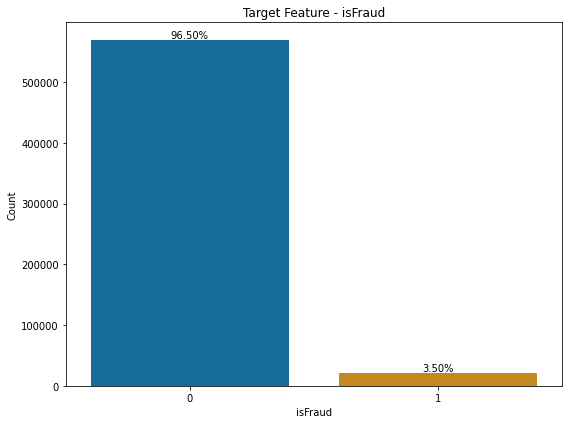

In [13]:
value_counts = df['isFraud'].value_counts()
percentages = df['isFraud'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='isFraud', palette='colorblind')
plt.title('Target Feature - isFraud')
plt.ylabel('Count')

# Add percentage labels on top of bars
for p, percentage in zip(ax.patches, percentages.sort_index()):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

plt.show()

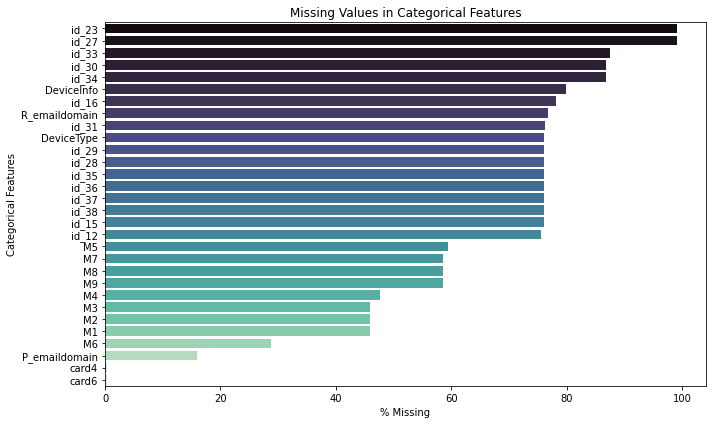

In [14]:

# Load your dataset
# Example: df = pd.read_csv('train_transaction.csv')
# Replace df with your actual DataFrame if already loaded
# Make sure you also load and merge identity if needed

# Step 1: Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Optional: include some known categorical columns by name
# categorical_cols += ['ProductCD', 'card4', 'card6', 'DeviceType', 'DeviceInfo']

# Step 2: Calculate missing percentages for categorical columns
missing_cat = df[categorical_cols].isnull().mean().sort_values(ascending=False) * 100

# Step 3: Filter to show only those with missing values
missing_cat = missing_cat[missing_cat > 0]

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_cat.values, y=missing_cat.index, palette='mako')
plt.title('Missing Values in Categorical Features')
plt.xlabel('% Missing')
plt.ylabel('Categorical Features')
plt.tight_layout()
plt.show()


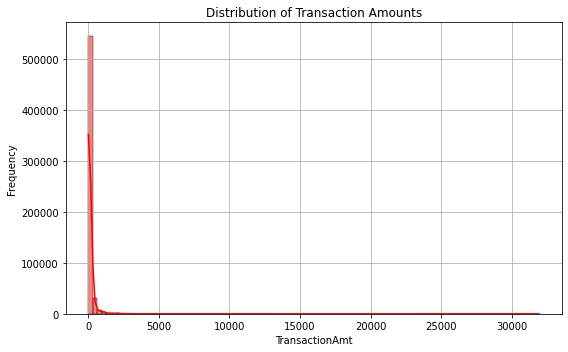

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TransactionAmt'], bins=100, kde=True, color='red')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('TransactionAmt')
plt.ylabel('Frequency')
plt.grid(True)

# Step 3: Save image
plt.tight_layout()
#plt.savefig('transaction_amt_histogram.png', dpi=300)
plt.show()

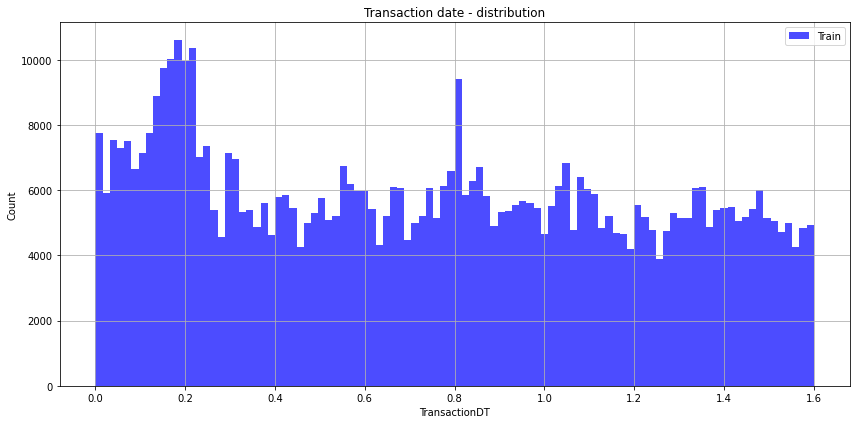

In [15]:
# df_train = pd.read_csv('train_transaction.csv')
# df_test = pd.read_csv('test_transaction.csv')

# Normalize TransactionDT to scale from 0 to 1 for both
train_dt = df['TransactionDT']
#test_dt = df_test['TransactionDT']

# Normalize for visualization clarity
train_dt_norm = (train_dt - train_dt.min()) / (train_dt.max() - train_dt.min()) * 1.6
#test_dt_norm = (test_dt - test_dt.min()) / (test_dt.max() - test_dt.min()) * 0.5 + 2  # Offset to separate

# Plot
plt.figure(figsize=(12, 6))
plt.hist(train_dt_norm, bins=100, color='blue', label='Train', alpha=0.7)
#plt.hist(test_dt_norm, bins=100, color='green', label='Test', alpha=0.7)
plt.title('Transaction date - distribution')
plt.xlabel('TransactionDT')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
start_date = pd.to_datetime('2017-12-01')

# Create Transaction datetime
df['TransactionDate'] = df['TransactionDT'].apply(lambda x: start_date + pd.Timedelta(seconds=x))

# Create new features
df['dayofweek'] = df['TransactionDate'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['TransactionDate'].dt.hour

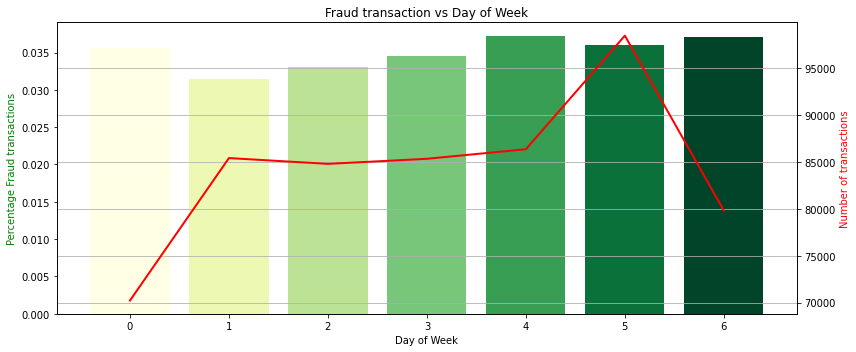

In [17]:
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce')

# Aggregate
fraud_rate = df.groupby('dayofweek')['isFraud'].mean()
transaction_count = df['dayofweek'].value_counts().sort_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Bar plot for fraud rate (left y-axis)
bar = ax1.bar(fraud_rate.index, fraud_rate.values, color=plt.cm.YlGn(fraud_rate.index / 6))
ax1.set_ylabel('Percentage Fraud transactions', color='green')
ax1.set_xlabel('Day of Week')
ax1.set_title('Fraud transaction vs Day of Week')

# Line plot for transaction count (right y-axis)
ax2 = ax1.twinx()
ax2.plot(transaction_count.index, transaction_count.values, color='red', linewidth=2)
ax2.set_ylabel('Number of transactions', color='red')

plt.grid(True)
plt.tight_layout()
plt.show()

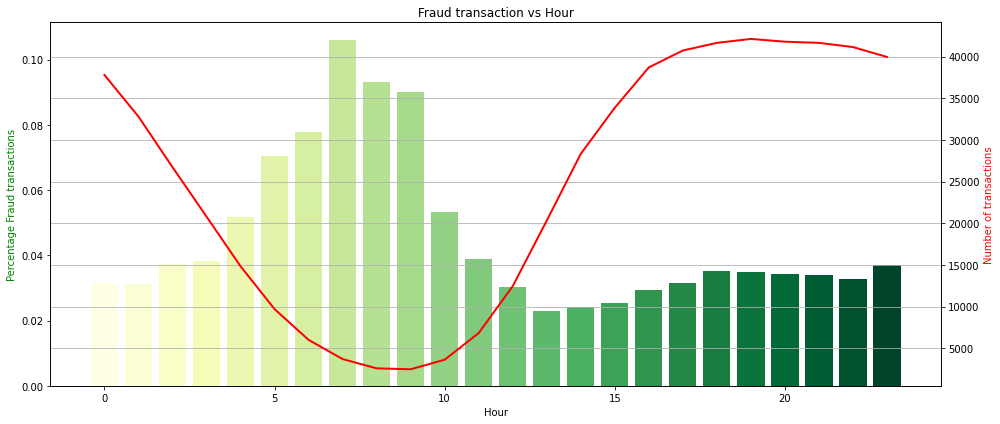

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your DataFrame has 'isFraud' and 'hour' columns
# If not, extract 'hour' from 'TransactionDT':
# df['TransactionDate'] = pd.to_datetime('2017-01-01') + pd.to_timedelta(df['TransactionDT'], unit='s')
# df['hour'] = df['TransactionDate'].dt.hour

# Convert 'isFraud' to numeric if needed
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce')

# Calculate fraud rate and transaction count by hour
fraud_rate_hour = df.groupby('hour')['isFraud'].mean()
transaction_count_hour = df['hour'].value_counts().sort_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for fraud rate
colors = plt.cm.YlGn(fraud_rate_hour.index / 23)
bars = ax1.bar(fraud_rate_hour.index, fraud_rate_hour.values, color=colors)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Percentage Fraud transactions', color='green')
ax1.set_title('Fraud transaction vs Hour')

# Line plot for number of transactions
ax2 = ax1.twinx()
ax2.plot(transaction_count_hour.index, transaction_count_hour.values, color='red', linewidth=2)
ax2.set_ylabel('Number of transactions', color='red')

plt.grid(True)
plt.tight_layout()
plt.show()


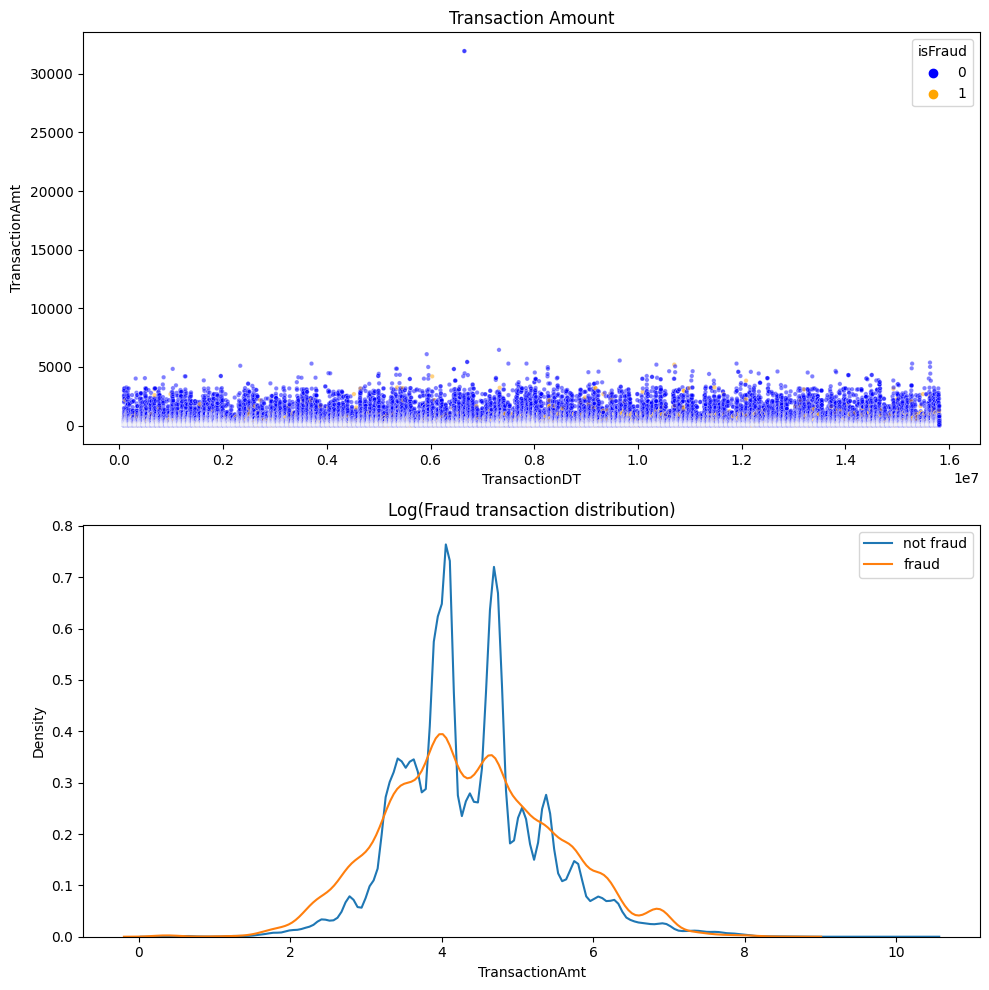

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume df is your training DataFrame with 'TransactionDT', 'TransactionAmt', 'isFraud'

# Setup figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
plt.style.use('default')

# --------------------------------------
# Top Plot: Scatter TransactionDT vs Amt
# --------------------------------------
sns.scatterplot(
    data=df, x='TransactionDT', y='TransactionAmt', hue='isFraud',
    palette={0: 'blue', 1: 'orange'}, alpha=0.5, ax=axes[0], s=10
)
axes[0].set_title('Transaction Amount')
axes[0].legend(title='isFraud')

# --------------------------------------
# Bottom Plot: Log-transformed KDE Plot
# --------------------------------------
# Add log-transformed column
df['log_TransactionAmt'] = np.log(df['TransactionAmt'] + 1)  # Avoid log(0)

# KDE plot by fraud class
sns.kdeplot(
    data=df[df['isFraud'] == 0]['log_TransactionAmt'],
    label='not fraud', ax=axes[1]
)
sns.kdeplot(
    data=df[df['isFraud'] == 1]['log_TransactionAmt'],
    label='fraud',  ax=axes[1]
)

axes[1].set_title('Log(Fraud transaction distribution)')
axes[1].set_xlabel('TransactionAmt')
axes[1].set_ylabel('Density')
axes[1].legend()

# Final formatting
plt.tight_layout()
plt.show()


Value counts for ProductCD:
 W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


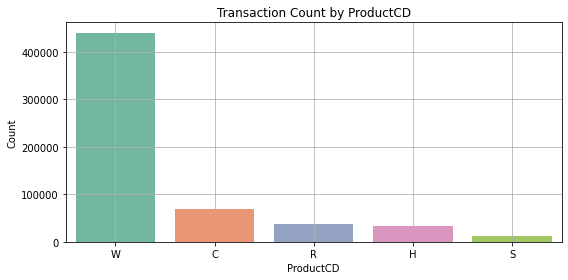

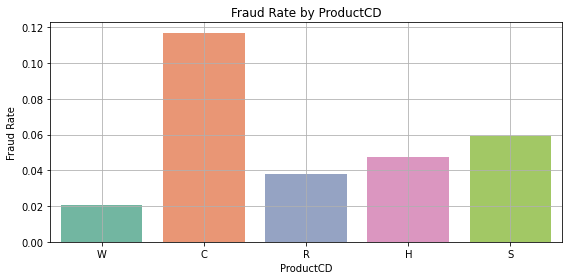

In [24]:

# Assume df is your DataFrame with 'ProductCD' and 'isFraud'
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce')

# 1. Value counts and sorting
product_counts = df['ProductCD'].value_counts()
sorted_productcd = product_counts.index.tolist()
print("Value counts for ProductCD:\n", product_counts)

# 2. Define a consistent color palette
palette_colors = sns.color_palette('Set2', len(sorted_productcd))
color_mapping = dict(zip(sorted_productcd, palette_colors))

# 3. Bar plot: Count of transactions by ProductCD
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='ProductCD', order=sorted_productcd, palette=color_mapping)
plt.title('Transaction Count by ProductCD')
plt.xlabel('ProductCD')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Fraud rate by ProductCD
fraud_rate = df.groupby('ProductCD')['isFraud'].mean().reindex(sorted_productcd)

plt.figure(figsize=(8, 4))
sns.barplot(x=fraud_rate.index, y=fraud_rate.values,
            palette=[color_mapping[pcd] for pcd in sorted_productcd])
plt.title('Fraud Rate by ProductCD')
plt.xlabel('ProductCD')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

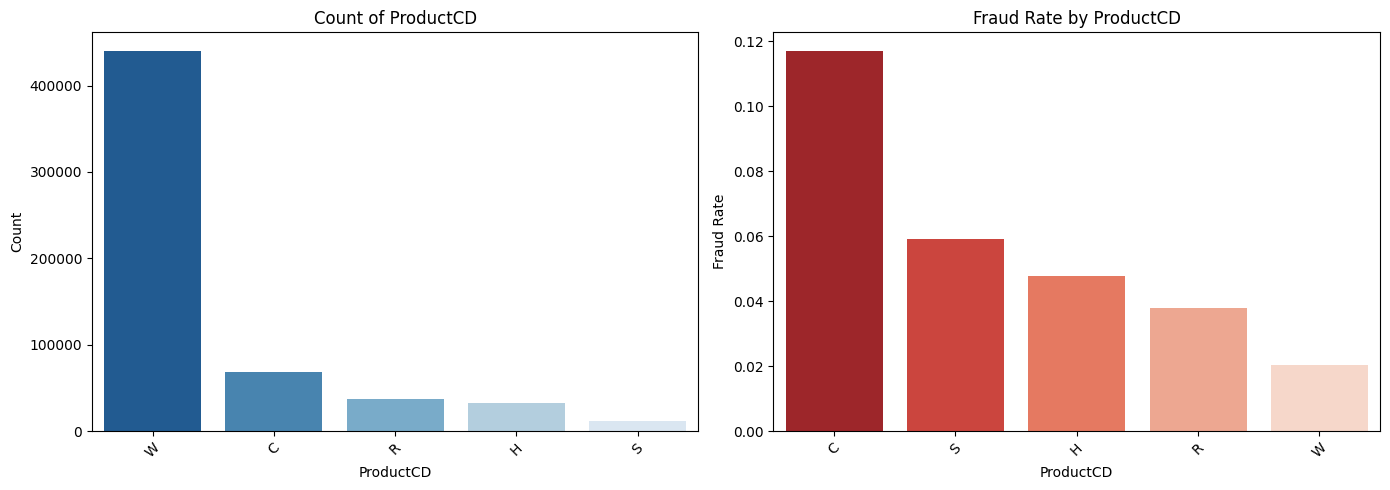

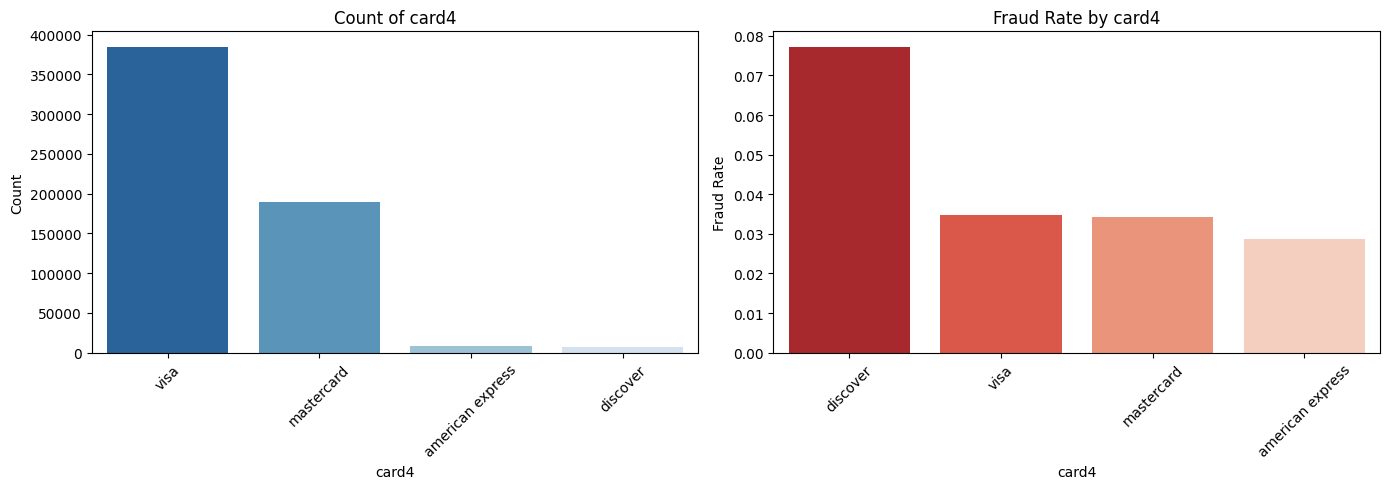

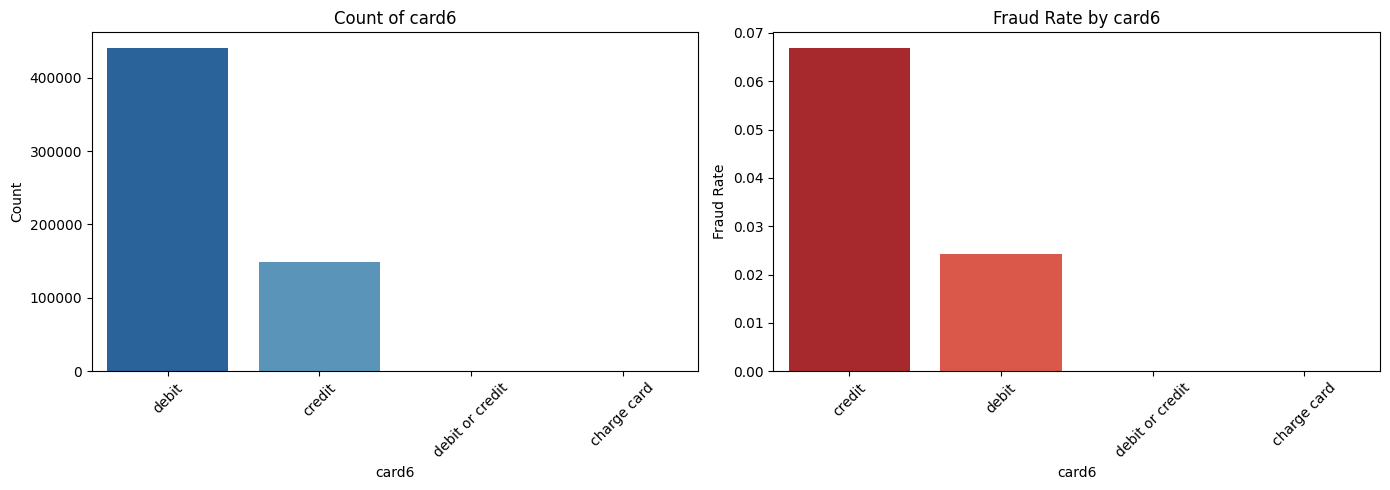

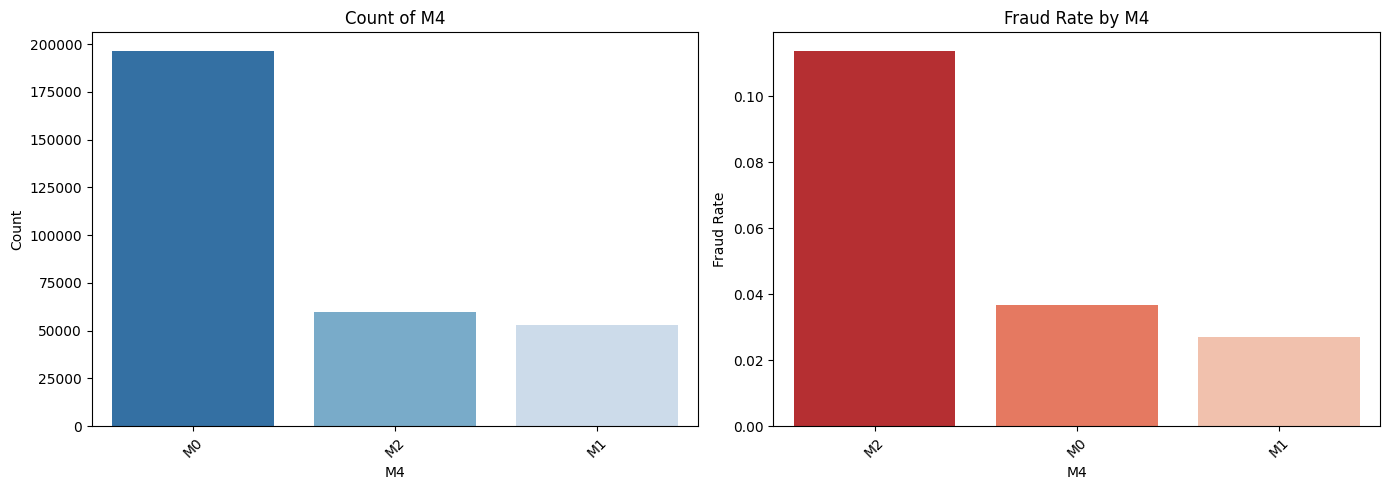

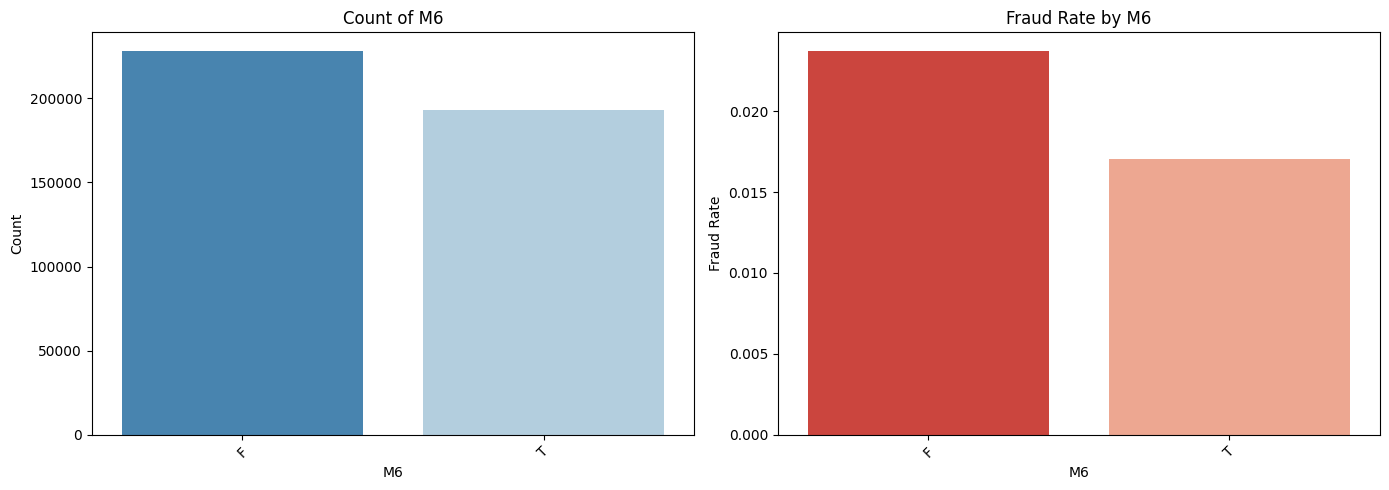

In [51]:
# Ensure 'isFraud' is numeric
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce')

# List of categorical features to visualize
cat_features = ['ProductCD', 'card4', 'card6', 'M4', 'M6']  # Extend as needed

for feature in cat_features:
    plt.figure(figsize=(14, 5))

    # Subplot 1: Count plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette='Blues_r')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Subplot 2: Fraud rate plot
    plt.subplot(1, 2, 2)
    fraud_rate = df.groupby(feature)['isFraud'].mean().sort_values(ascending=False)
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='Reds_r')
    plt.title(f'Fraud Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [9]:
pd.crosstab(df['isFraud'], df['DeviceInfo'])

DeviceInfo,0PAJ5,0PJA2,0PM92,1016S,2PQ93,2PS64 Build/NRD90M,2PYB2,2PZC5,4003A,4009F,...,verykoolS5019,verykoolS5524,verykoolS5525,verykoolS5530 Build/LMY47I,verykools4009,verykools5004,verykools5034,verykools5035,vivo,xs-Z47b7VqTMxs
isFraud,,,,,,,,,,,,,,,,,,,,,
0,1,1,2,1,1,6,4,2,1,2,...,1,1,3,4,2,2,1,1,5,1
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
categoric_columns = ['ProductCD',
                     'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
                     'addr1', 'addr2',
                     'P_emaildomain', 'R_emaildomain',
                     'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
                     'DeviceType', 'DeviceInfo',
                     'id_12', 'id_13', 'id_14', 'id_15', 'id_16','id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24',
                     'id_25', 'id_26','id_27','id_28','id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34','id_35', 'id_36', 'id_37', 'id_38']
numeric_columns = []

for i in df.columns:
    if i not in categoric_columns:
        numeric_columns.append(i)

print('Numerical columns: ', numeric_columns)
print('Categoric columns: ', categoric_columns)

Numerical columns:  ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103

In [6]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Set a threshold for the null percentage
threshold = 30  # For example, consider columns with more than 60% null values
# Filter the columns based on the null percentage threshold
filtered_columns = null_percentage[null_percentage > threshold].index
print(filtered_columns)


# Create a new DataFrame with the filtered columns
df_v1 = df[filtered_columns]

for i in filtered_columns:
    if i in categoric_columns:
        categoric_columns.remove(i)
    else:
        if i in numeric_columns:
            numeric_columns.remove(i)
            
print('Numerical columns: ', numeric_columns)
print('Categoric columns: ', categoric_columns)


Index(['dist1', 'dist2', 'R_emaildomain', 'D2', 'D3', 'D5', 'D6', 'D7', 'D8',
       'D9',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=232)
Numerical columns:  ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90

In [12]:
df_null = pd.DataFrame(df.isnull().sum())
df_null.reset_index(inplace = True)
df_null.columns = ['Column','Nulls']
df_null['percent']=df_null['Nulls'].apply(calc_null_percent)

In [13]:
print(df_null)

             Column   Nulls    percent
0     TransactionID       0   0.000000
1           isFraud       0   0.000000
2     TransactionDT       0   0.000000
3    TransactionAmt       0   0.000000
4         ProductCD       0   0.000000
..              ...     ...        ...
429           id_36  449555  76.126088
430           id_37  449555  76.126088
431           id_38  449555  76.126088
432      DeviceType  449730  76.155722
433      DeviceInfo  471874  79.905510

[434 rows x 3 columns]


In [14]:
print(f'There are {df.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


In [16]:
#sns.histplot(df_null['percent'])

#plt.show()

In [15]:
count_null = 0

null_30 = []

for i in range(len(df_null)):
    if df_null.iloc[i,2] >30:
        count_null += 1
        null_30.append(df_null.iloc[i,0])
        

print(null_30)

['dist1', 'dist2', 'R_emaildomain', 'D2', 'D3', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14', 'M1', 'M2', 'M3', 'M4', 'M5', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V

In [16]:
len(null_30)

232

In [17]:
df_1 = df.drop(columns = null_30, axis = 1)

df_1.shape

(590540, 202)

In [18]:
df_1.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=202)

In [19]:
df_1.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# df_null.to_csv("D:\\analytics\\MS\\LJMU_Phase\\Papers\\Reasearch Proposal\\Credit Card Fraud Detection\\Datasets\\null.csv")

In [23]:
df_1.isna().sum()

TransactionID      0
isFraud            0
TransactionDT      0
TransactionAmt     0
ProductCD          0
                  ..
V317              12
V318              12
V319              12
V320              12
V321              12
Length: 202, dtype: int64

In [24]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
gc.collect()

20

In [25]:
df_1.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=202)

In [26]:
df_1['TransactionDT']= pd.to_datetime(df_1['TransactionDT'])

In [27]:
df_1['TransactionDT'].describe()

count                            590540
unique                           573349
top       1970-01-01 00:00:00.009474817
freq                                  8
first     1970-01-01 00:00:00.000086400
last      1970-01-01 00:00:00.015811131
Name: TransactionDT, dtype: object

In [28]:
Transaction_features = [features for features in df_1.columns if 'Transaction' in features] 

Transaction_features 


['TransactionID', 'TransactionDT', 'TransactionAmt']

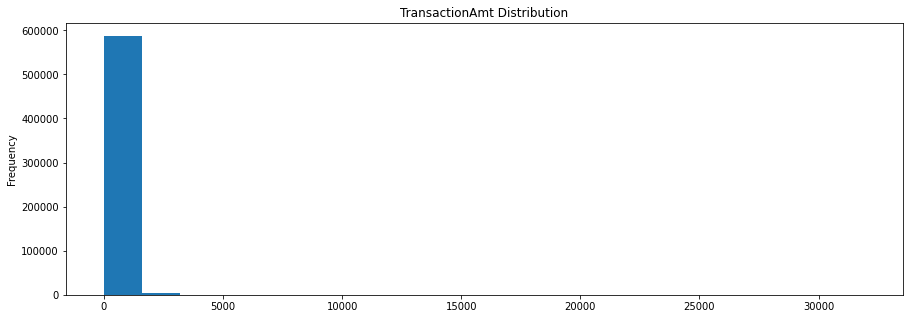

In [29]:
df_1['TransactionAmt'].plot(kind='hist', figsize=(15, 5), label='test', bins=20, title='TransactionAmt Distribution')

plt.show()

In [30]:
df_1[['TransactionAmt']].describe()

,TransactionAmt
count,590540.000000
mean,135.027176
std,239.162522
min,0.251000
25%,43.321000
50%,68.769000
75%,125.000000
max,31937.391000


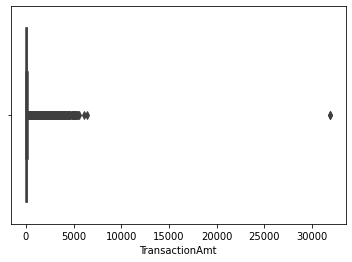

In [31]:
sns.boxplot(df_1['TransactionAmt'])
plt.show()

In [32]:
card_features = [features for features in df_1.columns if 'card' in features]

card_features

['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

In [33]:
for features in  card_features:

    print(f"total number of categories in  {features} : {len(df_1[features].value_counts())} ")

total number of categories in  card1 : 13553 
total number of categories in  card2 : 500 
total number of categories in  card3 : 114 
total number of categories in  card4 : 4 
total number of categories in  card5 : 119 
total number of categories in  card6 : 4 


In [34]:
c_features = [features for features in df_1.columns if 'C' in features] 

#c_features.remove('ProductCD')

c_features

['ProductCD',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14']

In [35]:
for features in  c_features:

    print(f"total number of categories in  {features} : {len(df_1[features].value_counts())} ")

total number of categories in  ProductCD : 5 
total number of categories in  C1 : 1657 
total number of categories in  C2 : 1216 
total number of categories in  C3 : 27 
total number of categories in  C4 : 1260 
total number of categories in  C5 : 319 
total number of categories in  C6 : 1328 
total number of categories in  C7 : 1103 
total number of categories in  C8 : 1253 
total number of categories in  C9 : 205 
total number of categories in  C10 : 1231 
total number of categories in  C11 : 1476 
total number of categories in  C12 : 1199 
total number of categories in  C13 : 1597 
total number of categories in  C14 : 1108 


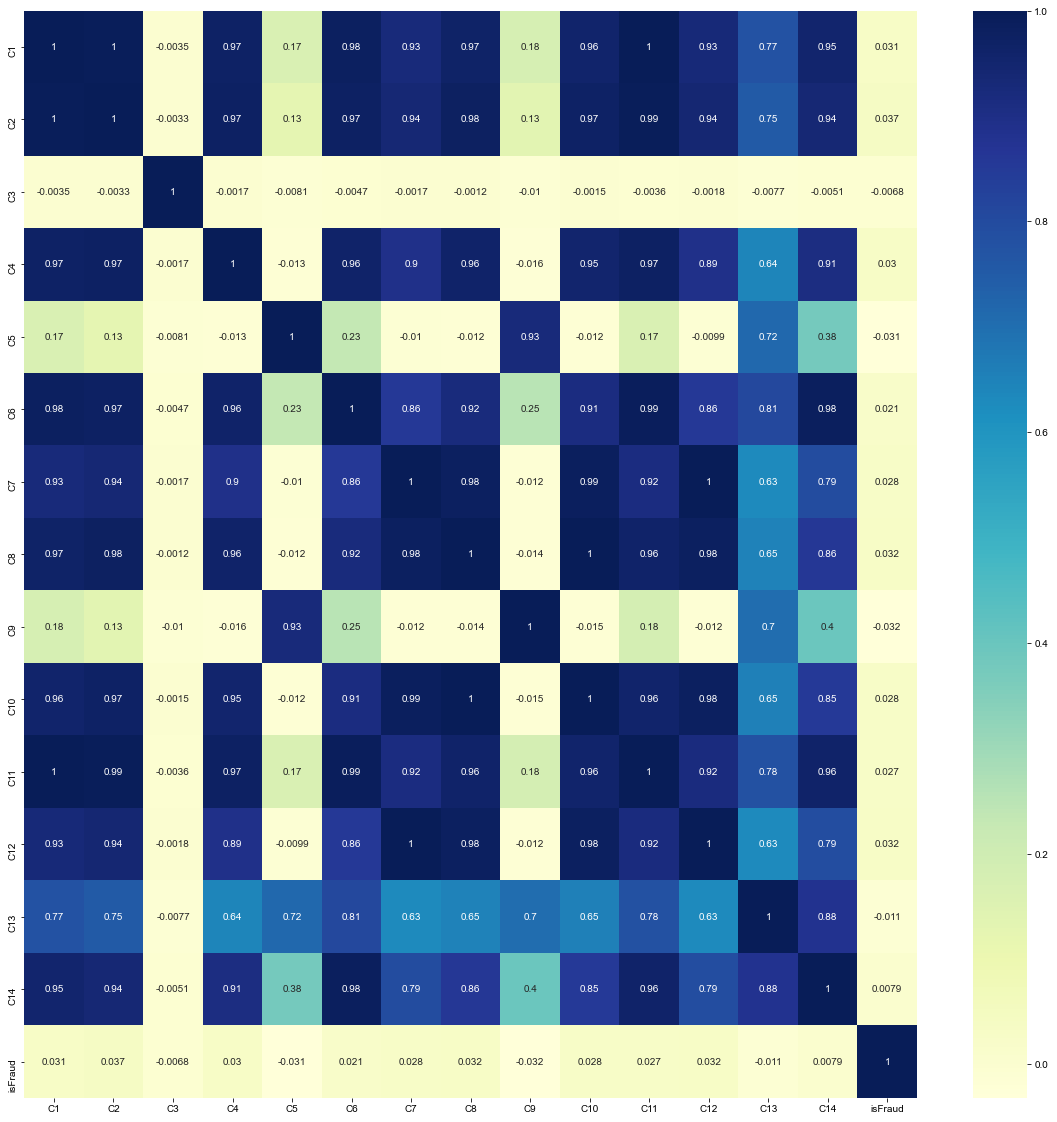

In [36]:
c_features += ['isFraud']
correlation_c = df_1[c_features].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_c,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [37]:
#D_features = [features for features in df_1.columns if 'D' in features] 

D_features = ['D1', 'D4', 'D10', 'D15']

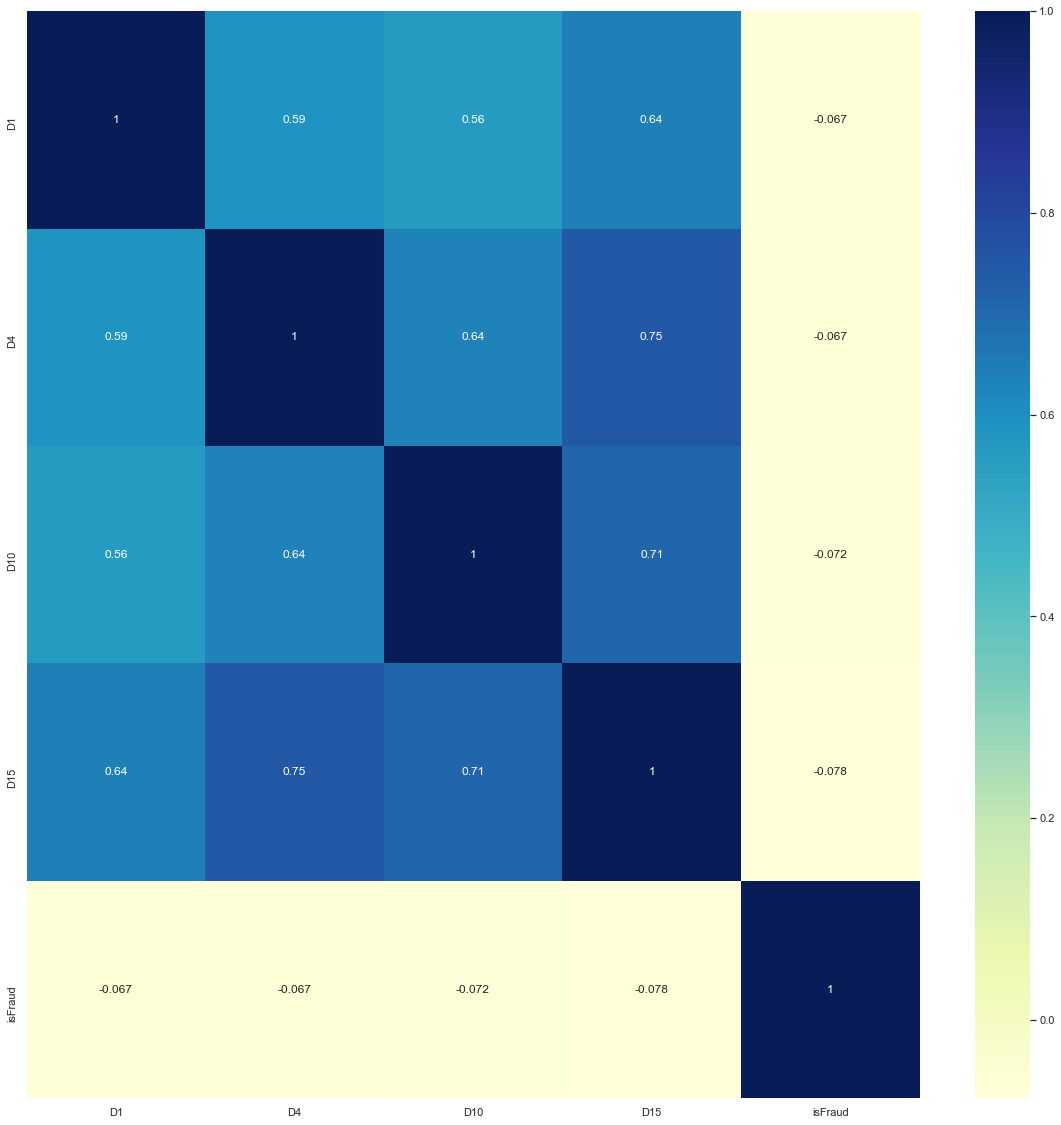

In [38]:
D_features += ['isFraud']

correlation_D = df_1[D_features].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_D,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [39]:
V_features = [features for features in df_1.columns if 'V' in features] 

V_features #= ['D1', 'D4', 'D10', 'D15']

['V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',

In [40]:
len(V_features)

169

In [41]:
V_features1=['V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34']

In [42]:
V_features2 = ['V35','V36','V37','V38','V39','V40','V41','V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52']

In [43]:
V_features3 = ['V53','V54','V55','V56','V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70','V71','V72','V73','V74']

In [44]:
V_features4 = ['V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94']

In [45]:
V_features5 = ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']

In [46]:
V_features6=['V138', 'V139', 'V140', 'V141', 'V142', 'V146', 'V147', 'V148', 'V149', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V161', 'V162', 'V163']

In [47]:
V_features7 = ['V143', 'V144', 'V145', 'V150', 'V151', 'V152', 'V159', 'V160', 'V164', 'V165', 'V166']

In [48]:
V9G = ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216']

V10G= ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278']

V11G = ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272']

V12G = ['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']

V13G = ['V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']



In [49]:
id_features =[features for features in df_1.columns if 'id_' in features]

id_features

[]

In [50]:
email_features =[features for features in df_1.columns if 'emaildomain' in features]

for f in email_features:
    print(f)
    print(df_1[f].value_counts())

P_emaildomain
gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
windstream.net         305
roadrunner.com         305
hotmail.es             305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com       

In [51]:
Device_features =[features for features in df_1.columns if 'Device' in features]

for f in Device_features:
    print(f)
    print(df_1[f].value_counts())

In [20]:
df_1.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_1.isnull().sum()

TransactionID      0
isFraud            0
TransactionDT      0
TransactionAmt     0
ProductCD          0
                  ..
V317              12
V318              12
V319              12
V320              12
V321              12
Length: 202, dtype: int64

In [23]:
df_1['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [24]:
print('Numerical columns: ', numeric_columns)
print('Categoric columns: ', categoric_columns)

Numerical columns:  ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', '

In [31]:

cat_onehot=[]
cat_label = []

for i in categoric_columns:
    #print(df_1[i].value_counts())
    print(i, df_1[i].nunique())
    #print(i, df_1[i].isnull().sum())
    if df_1[i].nunique()<=10:
        cat_onehot.append(i)
    else:
        cat_label.append(i)
 
print(cat_onehot)
print(cat_label)
        

ProductCD 5
card1 13553
card2 500
card3 114
card4 4
card5 119
card6 4
addr1 332
addr2 74
P_emaildomain 59
M6 2
['ProductCD', 'card4', 'card6', 'M6']
['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'P_emaildomain']


In [39]:
col_scaling = ['TransactionAmt', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
               'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'V12', 'V13',
               'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
               'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35',
               'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46',
               'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 
               'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 
               'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 
               'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 
               'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
               'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
               'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121',
               'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 
               'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 
               'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292',
               'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302',
               'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312',
               'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']

scaler = StandardScaler()

df_1[col_scaling] = scaler.fit_transform(df_1[col_scaling])

df_1.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V319,V320,V321,card1_LE,card2_LE,card3_LE,card5_LE,addr1_LE,addr2_LE,P_emaildomain_LE
0,2987000,0,86400,-0.278167,W,13926,NaN,150.0,discover,142.0,...,-0.055288,-0.088856,-0.074143,3417,500,42,38,166,65,32
1,2987001,0,86401,-0.443327,W,2755,404.0,150.0,mastercard,102.0,...,-0.055288,-0.088856,-0.074143,7922,303,42,2,173,65,16
2,2987002,0,86469,-0.317889,W,4663,490.0,150.0,visa,166.0,...,-0.055288,-0.088856,-0.074143,9383,389,42,58,178,65,36
3,2987003,0,86499,-0.355521,W,18132,567.0,150.0,mastercard,117.0,...,-0.055288,-0.088856,-0.074143,6991,466,42,14,282,65,54
4,2987004,0,86506,-0.355521,H,4497,514.0,150.0,mastercard,102.0,...,-0.055288,-0.088856,-0.074143,9262,413,42,2,241,65,16


In [37]:
### Label Encoding

label_encoders = {}
for col in cat_label:
    le = LabelEncoder()
    df_1[col + '_LE'] = le.fit_transform(df_1[col].astype(str))
    label_encoders[col] = le  # Store encoder if you need to inverse transform later

print(df_1.head())



   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V319  V320  V321 card1_LE  card2_LE  \
0    NaN  150.0    discover  142.0  ...  0.0   0.0   0.0     3417       500   
1  404.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0     7922       303   
2  490.0  150.0        visa  166.0  ...  0.0   0.0   0.0     9383       389   
3  567.0  150.0  mastercard  117.0  ...  0.0   0.0   0.0     6991       466   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0     9262       413   

   card3_LE  card5_LE  addr1_LE  addr2_LE  P_emaildomain_LE  


In [34]:
# One-Hot Encoding using scikit-learn
onehot_encoder = OneHotEncoder(sparse=False, drop=None)

encoded_array = onehot_encoder.fit_transform(df_1[cat_onehot])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(cat_onehot))

# Combine with original DataFrame
df_encoded = pd.concat([df_1, encoded_df], axis=1)

print(df_encoded.head)

C:\Users\veln8\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ... card4_visa  card4_nan  \
0       13926    NaN  

In [35]:
df_encoded.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'card4_visa', 'card4_nan', 'card6_charge card', 'card6_credit',
       'card6_debit', 'card6_debit or credit', 'card6_nan', 'M6_F', 'M6_T',
       'M6_nan'],
      dtype='object', length=220)

In [42]:

# Separate features and target
X = df_encoded.drop('isFraud', axis=1)
y = df_encoded['isFraud']

# Optional: split before SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame if needed
X_res_df = pd.DataFrame(X_resampled, columns=X.columns)
y_res_df = pd.Series(y_resampled, name='isFraud')

# Check the class distribution after SMOTE
print(y_res_df.value_counts())


ValueError: could not convert string to float: 'W'